<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- [X] The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- [ ] Normalize the data (all features should have roughly the same scale)
- [X] Import the type of model and layers that you will need from Keras.
- [X] Instantiate a model object and use `model.add()` to add layers to your model
- [X] Since this is a regression model you will have a single output node in the final layer.
- [X] Use activation functions that are appropriate for this task
- [X] Compile your model
- [X] Fit your model and report its accuracy in terms of Mean Squared Error
- [X] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- [ ] Run this same data through a linear regression model. Which achieves higher accuracy?
- [ ] Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- [ ] After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing, fashion_mnist
import pandas as pd

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

for i in range(len(X_train[0])):
    print(f'Feature {i} range: {(min(X_train[:,i]), max(X_train[:,i]))}')
    print(f'  unique values: {pd.Series(X_train[:,i]).nunique()}')
    print()
    

Feature 0 range: (0.00632, 88.9762)
  unique values: 404

Feature 1 range: (0.0, 100.0)
  unique values: 25

Feature 2 range: (0.46, 27.74)
  unique values: 71

Feature 3 range: (0.0, 1.0)
  unique values: 2

Feature 4 range: (0.385, 0.871)
  unique values: 79

Feature 5 range: (3.561, 8.725)
  unique values: 374

Feature 6 range: (2.9, 100.0)
  unique values: 296

Feature 7 range: (1.1296, 10.7103)
  unique values: 338

Feature 8 range: (1.0, 24.0)
  unique values: 9

Feature 9 range: (188.0, 711.0)
  unique values: 62

Feature 10 range: (12.6, 22.0)
  unique values: 46

Feature 11 range: (0.32, 396.9)
  unique values: 286

Feature 12 range: (1.73, 37.97)
  unique values: 371



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_mean_absolute_error', min_delta=0.5, patience=3)

model = Sequential([
    Flatten(),
    Dense(13, input_dim=13, activation='relu'),
    Dense(13, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test,y_test),
                    callbacks=[stop])

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 684us/sample - loss: 303.7208 - mean_absolute_error: 14.3095 - val_loss: 209.6790 - val_mean_absolute_error: 12.1112
Epoch 2/50
404/404 [==============================] - 0s 47us/sample - loss: 125.9246 - mean_absolute_error: 8.7055 - val_loss: 116.1984 - val_mean_absolute_error: 8.0003
Epoch 3/50
404/404 [==============================] - 0s 52us/sample - loss: 93.1710 - mean_absolute_error: 7.4016 - val_loss: 93.2531 - val_mean_absolute_error: 7.8600
Epoch 4/50
404/404 [==============================] - 0s 54us/sample - loss: 82.6483 - mean_absolute_error: 7.0487 - val_loss: 80.9367 - val_mean_absolute_error: 6.7886
Epoch 5/50
404/404 [==============================] - 0s 52us/sample - loss: 78.0335 - mean_absolute_error: 6.8458 - val_loss: 75.4005 - val_mean_absolute_error: 6.7389
Epoch 6/50
404/404 [==============================] - 0s 52us/sample - loss: 72.9487 - mean_absolute_e

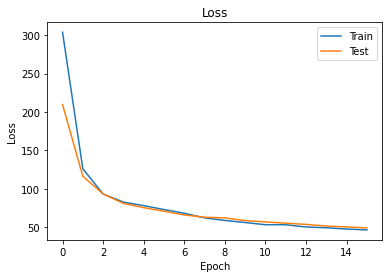

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- [ ] Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- [ ] Make sure to one-hot encode your category labels
- [ ] The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- [ ] Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- [ ] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [5]:
##### Your Code Here #####
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

temp =[]
for i in range(len(X_train)):
    temp.append(list(np.divide(X_train[i], 255)))
X_train = temp
    
temp = []
for i in range(len(X_test)):
    temp.append(list(np.divide(X_test[i], 255)))
X_test = temp

In [6]:
len(X_train)

60000

In [ ]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(500, input_dim=784, activation='relu'),
    Dense(200, activation='relu'),
    Dense(80, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test,y_test),
                    callbacks=[stop])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.